In [65]:
import bw2data as bd
import bw2io as bi
from pathlib import Path

In [66]:
PROJECT_NAME = "Linking dMFA & LCA"

bi.restore_project_directory(
    fp='/etc/data/ecoinvent-3.10-cutoff-bw25.tar.gz',
    project_name=PROJECT_NAME,
    overwrite_existing=True
)
bd.projects.set_current(PROJECT_NAME)

db=bd.Database('ecoinvent-3.10-cutoff')

# Define end-of-life treatment
steel_recycling_RER = bd.get_node(name='steel production, electric, chromium steel 18/8', location = 'RER')
steel_recycling_RER

my_edge = list(steel_recycling_RER.edges())[14]
my_edge.delete()

#%% PRODUCT NODES
scrap_stainless_steel = db.new_node(
    code='scrap stainless steel',
    name="scrap stainless steel",
    unit="kg",
    type=bd.labels.product_node_default,
)
#%% SAVING
scrap_stainless_steel.save()

#%% CONSUMPTION EDGES
steel_recycling_RER.new_edge(
    amount=0.551, 
    type=bd.labels.consumption_edge_default,
    input=scrap_stainless_steel
).save()

Restoring project backup archive - this could take a few minutes...
Restored project: Linking dMFA & LCA
08:38:06+0000 [info     ] Applying automatic update: 4.0 database search directories FTS5
08:38:06+0000 [info     ] Reindexing database ecoinvent-3.10-biosphere
08:38:06+0000 [info     ] Reindexing database ecoinvent-3.10-cutoff


In [67]:
import bw2data as bd
import bw2io as bi

PROJECT_NAME = "linking LCA & dMFA_production"

bi.restore_project_directory(
    fp='/etc/data/ecoinvent-3.10-cutoff-bw25.tar.gz',
    project_name=PROJECT_NAME, overwrite_existing=True
)



Restoring project backup archive - this could take a few minutes...
Restored project: linking LCA & dMFA_production


'linking LCA & dMFA_production'

In [68]:
bd.projects.set_current("linking LCA & dMFA_production")


08:38:22+0000 [info     ] Applying automatic update: 4.0 database search directories FTS5
08:38:22+0000 [info     ] Reindexing database ecoinvent-3.10-biosphere
08:38:22+0000 [info     ] Reindexing database ecoinvent-3.10-cutoff


In [69]:
print(bd.databases)

Databases dictionary with 2 object(s):
	ecoinvent-3.10-biosphere
	ecoinvent-3.10-cutoff


In [70]:
db = bd.Database("ecoinvent-3.10-cutoff")
print(len(db))  # Total number of activities
print(list(db)[:3])  # Display a few sample activitiesn

23523
['market for electricity, high voltage' (kilowatt hour, PE, None), 'market for waste polyethylene' (kilogram, BR, None), 'market for bagasse, from sugarcane' (kilogram, CO, None)]


In [71]:
db = bd.Database("ecoinvent-3.10-cutoff")
# Let the metadata system know this database exists. Not necessary if using a `bw2io` importer.
db.register(hi_mom=True, language="Singlish")

In [72]:
bd.databases

Databases dictionary with 2 object(s):
	ecoinvent-3.10-biosphere
	ecoinvent-3.10-cutoff

In [73]:
db.metadata

{'overwrite': False,
 'format': 'Ecoinvent XML',
 'depends': ['ecoinvent-3.10-biosphere'],
 'backend': 'sqlite',
 'number': 0,
 'modified': '2025-06-26T08:38:35.422940',
 'geocollections': [],
 'processed': '2025-06-26T08:38:35.424530',
 'dirty': False,
 'searchable': True}

In [74]:
kettle = db.new_node(
    name="kettle",
    unit="number",
    type=bd.labels.product_node_default,
)

kettle_production = db.new_node(
    name="kettle production",
    location="RER",
    type=bd.labels.process_node_default,
)

kettle.save()
kettle_production.save()

In [75]:
#electricity = db.new_node(
    #name='Electricity',
    #unit='kilowatt hour',
    #type=bd.labels.product_node_default,
#)
#electricity_production = db.new_node(
    #name='electricity production',
    #location='',
    #type=bd.labels.process_node_default,
#)

#electricity.save()
#electricity_production.save()

In [76]:
slt1_production = db.new_node(
    code="slt-production",
    name='stainless steel production', #market for steel, chromium steel 18/8
    location='RER',
    type=bd.labels.process_node_default,
)
slt1 = db.new_node(
    code="slt",
    name='steel',
    unit="kilogram",
    type=bd.labels.product_node_default,
)


slt1_production.save()
slt1.save()

In [77]:
slt2_production = db.new_node(
    code="slt-production2",
    name='stainless steel production2', #market for steel, chromium steel 18/8
    location='RER',
    type=bd.labels.process_node_default,
)
slt2 = db.new_node(
    code="slt2",
    name='steel2',
    unit="kilogram",
    type=bd.labels.product_node_default,
)


slt2_production.save()
slt2.save()

In [78]:
#cp_production = db.new_node(
    #code="cp-production",
    #name='copper production', #market for polypropylene, granulate
    #location='DE',
    #type=bd.labels.process_node_default,
#)
#cp = db.new_node(
    #code="cp",
    #name='copper',
    #unit="kilogram",
    #type=bd.labels.product_node_default,
#)


#cp_production.save()
#cp.save()

In [79]:
co2 = db.new_node(
    name="Carbon Dioxide", 
    context=('air',),
    tags={'CAS Number': '124-38-9'},
    unit='kilogram',
    type=bd.labels.biosphere_node_default,
)

co2.save()

In [80]:
kettle_production.new_edge(
    amount=1,
    input=kettle,
    type=bd.labels.production_edge_default,
).save()
slt1_production.new_edge(
    amount=1,
    input=slt1,
    type=bd.labels.production_edge_default,
).save()
slt2_production.new_edge(
    amount=1,
    input=slt2,
    type=bd.labels.production_edge_default,
).save()
#cp_production.new_edge(
   # amount=1,
    #input=cp,
    #type=bd.labels.production_edge_default,
#).save()
#electricity_production.new_edge(
    #amount=1,
    #input=electricity,
    #type=bd.labels.production_edge_default,
#).save()    

In [81]:
materials = {
    slt1: 0.546246,
    slt2: 0,
    #cp: 0.017046,
    # ... other nodes and their corresponding values in kilograms
}

for material, amount in materials.items():
    kettle_production.new_edge(
        amount=amount,
        type=bd.labels.consumption_edge_default,
        input=material
    ).save()

In [82]:
#slt_production.new_edge(
    #amount=0.01389,  # 0.01389 kWh of electricity, in the papaer (MARCINKOWSKI, 2017)
    #uncertainty_type=5, 
    #minimum=0.012, 
    #maximum=0.016,
    #type=bd.labels.consumption_edge_default,
    #input=electricity,
#).save()



In [83]:
#cp_production.new_edge(
    #amount=0.01389,  
    #uncertainty_type=5, 
    #minimum=0.012,  
    #maximum=0.016,  
    #type=bd.labels.consumption_edge_default,
    #input=electricity,
#).save()

In [84]:
slt1_production.new_edge(
    amount=4.62, 
    uncertainty_type=5, 
    minimum=4.158,
    maximum=5.082, 
    type=bd.labels.biosphere_edge_default,
    input=co2,
).save()

In [85]:
slt2_production.new_edge(
    amount=0, 
    uncertainty_type=5, 
    minimum=0,
    maximum=0, 
    type=bd.labels.biosphere_edge_default,
    input=co2,
).save()

In [86]:
import bw2calc as bc

In [87]:
functional_unit, data_objs, _ = bd.prepare_lca_inputs({kettle: 1}, remapping=False)

In [88]:
lca = bc.LCA(demand=functional_unit, data_objs=data_objs)
lca.lci()
lca.inventory[lca.dicts.biosphere[co2.id], :].sum()

2.5236564213757333

# Use Phase

In [89]:
kettle_service = db.new_node(
    name='kettle service per year',
    unit='kWh per year',
    type=bd.labels.product_node_default,
)

using_kettle = db.new_node(
    name='using kettle',
    location='IE',
    type=bd.labels.process_node_default,
)

kettle_service.save()
using_kettle.save()

In [92]:
using_kettle.new_edge(
    amount=1,
    input=kettle_service,
    type=bd.labels.production_edge_default,
).save()

In [90]:
electric_mix_IE = bd.get_node(
    name='market for electricity, medium voltage', 
    location='IE',
)
print(electric_mix_IE )

'market for electricity, medium voltage' (kilowatt hour, IE, None)


In [93]:
using_kettle.new_edge(
    amount=167, #value is average yearly energy used per kettle Durand et al. 2022
    type=bd.labels.consumption_edge_default,
    input=electric_mix_IE
).save()

In [94]:
functional_unit = {
    "use": {db.get(kettle_service['code']).id: 1},
}
multi_config = {
    "impact_categories": methods
}
multi_data_objs = bd.get_multilca_data_objs(functional_units=functional_unit, method_config=multi_config)

mlca = bc.MultiLCA(demands=functional_unit, method_config=multi_config, data_objs=multi_data_objs)
mlca.lci()
mlca.lcia()
mlca.scores

{(('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
  'use'): 54.562908842123264}

# End of Life

In [95]:
kettle_treated = db.new_node(
    name='kettle waste treated',
    unit='number',
    type=bd.labels.product_node_default,
)

treating_kettle = db.new_node(
    name='kettle waste treatment',
    location='IE',
    type=bd.labels.process_node_default,
)

kettle_treated.save()
treating_kettle.save()

In [96]:
treating_kettle.new_edge(
    amount=1,
    input=kettle_treated,
    type=bd.labels.production_edge_default,
).save()

In [138]:
waste_metal = [x for x in db if 'treatment of electronics scrap, metals recovery in copper smelter' == x['name'] and 'RoW' in x['location'] and 'metal part of electronics scrap, in copper, anode' in x['reference product']]
print(waste_metal)
print(waste_metal['id'])

['treatment of electronics scrap, metals recovery in copper smelter' (kilogram, RoW, None)]


TypeError: list indices must be integers or slices, not str

In [140]:
waste_metal = bd.get_node(
    name='market for metal part of electronics scrap, in copper, anode', 
)

print(waste_metal)

'market for metal part of electronics scrap, in copper, anode' (kilogram, GLO, None)


In [127]:
waste_plastic = bd.get_node(
    name='market for waste plastic, mixture',
    location='IE',
)

print(waste_plastic)

'market for waste plastic, mixture' (kilogram, IE, None)


In [145]:
treating_kettle.new_edge(
    amount=-27.349,
    type=bd.labels.consumption_edge_default,
    input=waste_metal
).save()

treating_kettle.new_edge(
    amount=-839.726,
    type=bd.labels.consumption_edge_default,
    input=waste_plastic
).save()

In [146]:
functional_unit = {
    "EoL": {db.get(kettle_treated['code']).id: 1},
}
multi_config = {
    "impact_categories": methods
}
multi_data_objs = bd.get_multilca_data_objs(functional_units=functional_unit, method_config=multi_config)

mlca = bc.MultiLCA(demands=functional_unit, method_config=multi_config, data_objs=multi_data_objs)
mlca.lci()
mlca.lcia()
mlca.scores

{(('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
  'EoL'): 925.6975888146592}

# Multi-Impact Assessment

In [60]:
# included recipie and just GWP100 
# methods = [
#     method for method in bd.methods 
#     if 'ReCiPe 2016 v1.03, midpoint (H)' in method[0] 
#     and 'LT' not in method[2]
# ]

methods = [
    method for method in bd.methods 
    if 'ipcc 2021' in method[0].lower() 
    and method[1] == 'climate change'
    and 'gwp100' in method[2].lower()
    and 'LT' not in method[2]
]
methods

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)')]

In [87]:
functional_unit = {
    "kettle": {db.get(kettle['code']).id: 1},
}
multi_config = {
    "impact_categories": methods
}
multi_data_objs = bd.get_multilca_data_objs(functional_units=functional_unit, method_config=multi_config)

In [88]:
mlca = bc.MultiLCA(demands=functional_unit, method_config=multi_config, data_objs=multi_data_objs)
mlca.lci()
mlca.lcia()
mlca.scores()

{(('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
  'kettle'): 0.0}

# MFA

In [26]:
import pandas as pd
import numpy as np
import scipy.stats
from os import chdir
import matplotlib.pyplot as plt

In [27]:
# Load input data, inflow-driven model:
stock_flow_timeseries = pd.read_excel(r'WEEE_generated_Tool_IE.xlsm', sheet_name='POM')
# Extract the relevant rows and columns

stock_flow_timeseries = stock_flow_timeseries.iloc[20,6:-9]
stock_flow_timeseries = stock_flow_timeseries.to_frame()

timesteps = range(1980,2023)

stock_flow_timeseries['year'] = timesteps

stock_flow_timeseries = stock_flow_timeseries.iloc[1:,:]
stock_flow_timeseries = stock_flow_timeseries.set_index('year')
stock_flow_timeseries = stock_flow_timeseries.rename(columns={20:'inflow'})


/opt/tljh/user/envs/bw25/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/tljh/user/envs/bw25/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [28]:
print(stock_flow_timeseries)


        inflow
year          
1981   191.574
1982   209.692
1983   227.432
1984   245.402
1985   262.572
1986   278.983
1987   295.891
1988   311.018
1989   325.363
1990   341.245
1991   359.519
1992   379.035
1993   397.613
1994    415.56
1995   413.586
1996   424.835
1997   462.496
1998   501.279
1999   562.957
2000   626.955
2001   778.758
2002   685.988
2003   904.264
2004  1123.515
2005  1071.773
2006  1020.329
2007   973.329
2008   918.575
2009   805.559
2010    777.26
2011   747.461
2012   917.471
2013   976.284
2014  1094.138
2015  1272.742
2016  1456.963
2017  1376.206
2018  1416.225
2019  1452.931
2020  1486.004
2021  1687.912
2022   1741.44


In [29]:
time_max = stock_flow_timeseries.shape[0]
timesteps = np.arange(0, time_max)

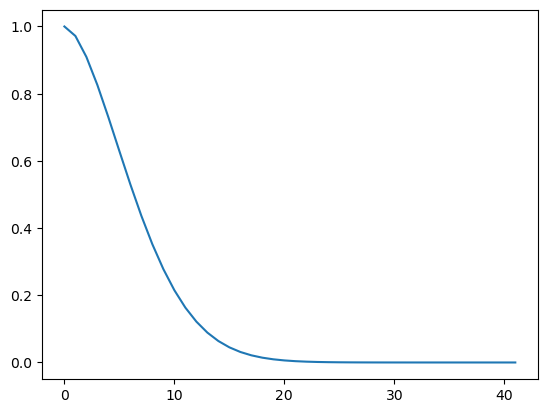

In [30]:
# Weibull distributed survival curve
# based on belgium 
curve_shape = 1.73
curve_scale = 7.8
curve_surv = scipy.stats.weibull_min.sf(timesteps, curve_shape, 0, curve_scale)
plt.plot(curve_surv)
curve_surv = curve_surv.astype(float)

In [31]:
print(curve_surv.dtype)

float64


In [32]:
# create survival curve matrix with placeholder zeros
curve_surv_matrix = pd.DataFrame(0.0, index=timesteps, columns=timesteps)
#print(curve_surv_matrix)
# populate the survival curve matrix with shifted curves, column by column using slices

for time in timesteps:
    curve_surv_matrix.loc[time:, time] = curve_surv[0:time_max - time]

#print(curve_surv_matrix)

In [33]:
# create survival matrix with placeholder zeros
cohort_surv_matrix = pd.DataFrame(0.0, index=timesteps, columns=timesteps)

# multiply the inflow times the shifted curves to get the cohorts' behavior over time

for time in timesteps:
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * stock_flow_timeseries['inflow'].iloc[time]

# set row index to years instead of timesteps
cohort_surv_matrix.index = stock_flow_timeseries.index

# calculate flows & stocks using the cohort_surv_matrix
stock_flow_timeseries['stock'] = cohort_surv_matrix.sum(axis=1)
stock_flow_timeseries['nas'] = np.diff(stock_flow_timeseries['stock'], prepend=0)  # prepending 0 assumes no initial stock
stock_flow_timeseries['outflow'] = stock_flow_timeseries['inflow'] - stock_flow_timeseries['nas']


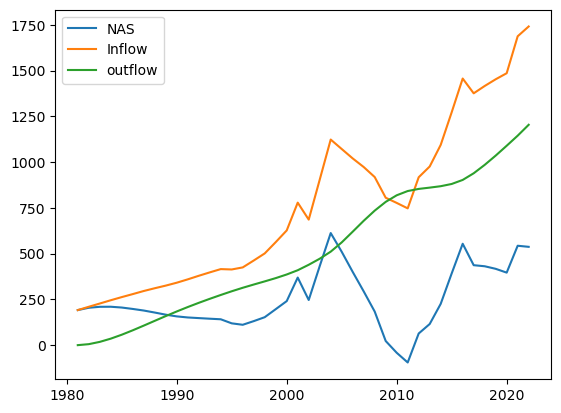

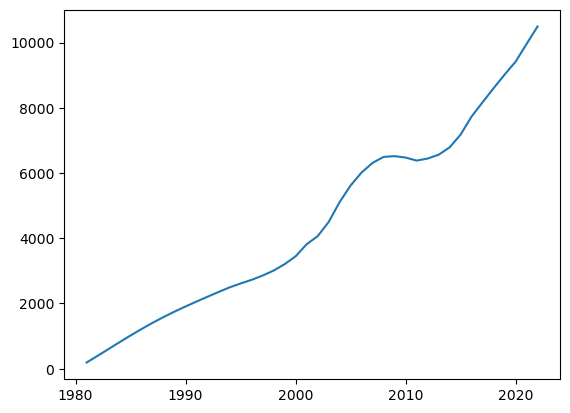

In [34]:
plt.plot(stock_flow_timeseries.index,stock_flow_timeseries['nas'], label = 'NAS')
plt.plot(stock_flow_timeseries.index,stock_flow_timeseries['inflow'], label = 'Inflow')
plt.plot(stock_flow_timeseries.index,stock_flow_timeseries['outflow'], label = 'outflow')
plt.legend()
plt.show()
plt.close()
plt.plot(stock_flow_timeseries.index,stock_flow_timeseries['stock'], label = 'stock')

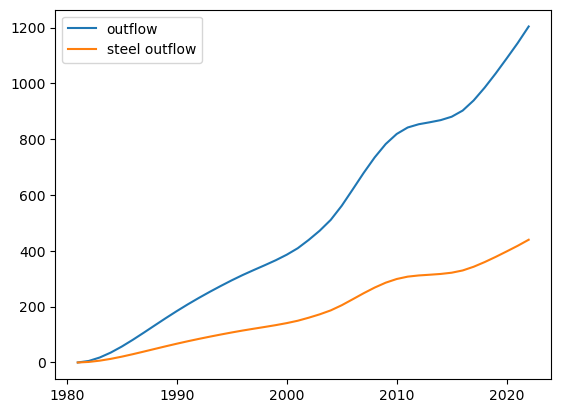

In [35]:
steel_intensity = 0.3653
steel_stock_flow_timeseries = stock_flow_timeseries*steel_intensity
plt.plot(stock_flow_timeseries.index,stock_flow_timeseries['outflow'], label = 'outflow')
plt.plot(steel_stock_flow_timeseries.index,steel_stock_flow_timeseries['outflow'], label = 'steel outflow')
plt.legend()

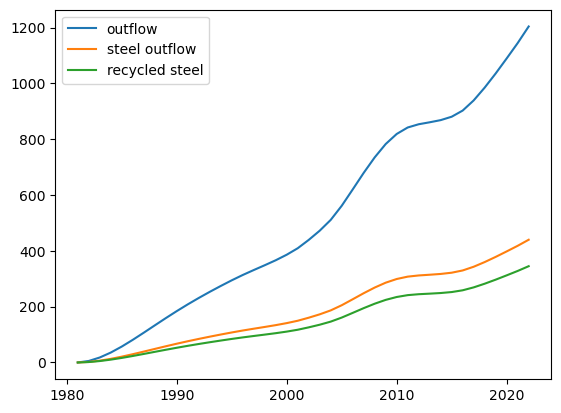

In [36]:
steel_recycle_efficiency = .784444
secondary_steel_stock_flow_timeseries = steel_stock_flow_timeseries*steel_recycle_efficiency


plt.plot(stock_flow_timeseries.index,stock_flow_timeseries['outflow'], label = 'outflow')
plt.plot(steel_stock_flow_timeseries.index,steel_stock_flow_timeseries['outflow'], label = 'steel outflow')
plt.plot(secondary_steel_stock_flow_timeseries.index,secondary_steel_stock_flow_timeseries['outflow'], label = 'recycled steel')
plt.legend()

In [37]:
secondary_steel_share = secondary_steel_stock_flow_timeseries['outflow']/steel_stock_flow_timeseries['inflow']
#print(secondary_steel_share)

In [38]:
zipped = zip(np.arange(time_max-len(timesteps), time_max), np.array(secondary_steel_share))
secondary_steel_share_dict = {}
for time_step, secondary_share in zipped:
    secondary_steel_share_dict[time_step] = secondary_share

secondary_steel_share_dict

{0: 0.0,
 1: 0.020220549836779397,
 2: 0.06161149056516167,
 3: 0.11355509467297879,
 4: 0.170377011437841,
 5: 0.22814196375824192,
 6: 0.2829506206772885,
 7: 0.335157941012714,
 8: 0.3829996852411873,
 9: 0.42313738081124247,
 10: 0.4542848107441111,
 11: 0.4784623873663422,
 12: 0.4993941220440544,
 13: 0.5175429585542917,
 14: 0.5584639861656617,
 15: 0.578910841440185,
 16: 0.561825376954089,
 17: 0.5453540790036875,
 18: 0.5104838887942497,
 19: 0.4832148924417496,
 20: 0.41238601935039126,
 21: 0.5023036343278511,
 22: 0.4097328453610008,
 23: 0.3567579367381307,
 24: 0.41100125670173093,
 25: 0.4767799601937566,
 26: 0.5477395355049691,
 27: 0.6277708933222904,
 28: 0.762416888980877,
 29: 0.8265113450552737,
 30: 0.8838255311127807,
 31: 0.7299886124713949,
 32: 0.6916730142226925,
 33: 0.6227203861871833,
 34: 0.5428643128657764,
 35: 0.48610717539442433,
 36: 0.535380772415173,
 37: 0.5456493039418815,
 38: 0.5592499659525586,
 39: 0.5752235489911421,
 40: 0.531999545691808

# Coupling

In [39]:
def update_material_composition(secondary_steel_share):
    materials = {}
    steel_primary_share = 1 - secondary_steel_share
    materials['slt1'] = 0.546246 * steel_primary_share
    materials['slt2'] = 0.546246 * secondary_steel_share
    return materials

In [40]:
update_material_composition(0)

{'slt1': 0.546246, 'slt2': 0.0}

In [41]:
materials_list = []
for value in secondary_steel_share_dict:
    materials_list.append(update_material_composition(secondary_steel_share_dict[value]))
materials_list

[{'slt1': 0.546246, 'slt2': 0.0},
 {'slt1': 0.5352006055338586, 'slt2': 0.011045394466141398},
 {'slt1': 0.5125909697247427, 'slt2': 0.033655030275257306},
 {'slt1': 0.48421698375526406, 'slt2': 0.062029016244735974},
 {'slt1': 0.4531782390101251, 'slt2': 0.0930677609898749},
 {'slt1': 0.4216243648649154, 'slt2': 0.12462163513508462},
 {'slt1': 0.39168535525751386, 'slt2': 0.15456064474248613},
 {'slt1': 0.36316731535356905, 'slt2': 0.18307868464643098},
 {'slt1': 0.33703395393574237, 'slt2': 0.2092120460642576},
 {'slt1': 0.31510889828138205, 'slt2': 0.23113710171861795},
 {'slt1': 0.2980947392702723, 'slt2': 0.2481512607297277},
 {'slt1': 0.284887834750685, 'slt2': 0.261358165249315},
 {'slt1': 0.2734539584099234, 'slt2': 0.2727920415900766},
 {'slt1': 0.2635402290615524, 'slt2': 0.2827057709384476},
 {'slt1': 0.24118728141295195, 'slt2': 0.3050587185870481},
 {'slt1': 0.2300182685066647, 'slt2': 0.31622773149333533},
 {'slt1': 0.23935113514033673, 'slt2': 0.3068948648596633},
 {'slt

In [ ]:
functional_unit = {
    "kettle": {eit.get(kettle['code']).id: 1},
}
multi_config = {
    "impact_categories": methods
}
multi_data_objs = bd.get_multilca_data_objs(functional_units=functional_unit, method_config=multi_config)

In [42]:
for value in np.array(secondary_steel_share):
    materials = update_material_composition(value)
    primary_input = list(kettle_production.technosphere())[0]
    secondary_input = list(kettle_production.technosphere())[1]
    
    primary_input['amount'] = materials['slt1']
    primary_input.save()

    secondary_input['amount'] = materials['slt2']
    secondary_input.save()
    
    
    lca = bc.LCA(demand=functional_unit, data_objs=data_objs)
    lca.lci()
    print(lca.inventory[lca.dicts.biosphere[co2.id], :].sum())
    
    # this should replace the above one but not sure if it will work, need to test above
    mlca = bc.MultiLCA(demands=functional_unit, method_config=multi_config, data_objs=multi_data_objs)
    mlca.lci()
    mlca.lcia()
    mlca.scores

2.5236564213757333
2.472626691604546
2.368170106162154
2.2370824295463194
2.0936833566366317
1.947904506354405
1.8095863490083275
1.6778329570721837
1.557096843892026
1.4558030602330518
1.3771977083479214
1.31618169802519
1.2633572217803248
1.2175558700563158
1.1142851803851386
1.062684394917781
1.1058022323516496
1.147370130310705
1.2353704671024843
1.304188082694992
1.482935881836113
1.256014664055101
1.489631449635766
1.623321956120293
1.4864305086292404
1.3204276812822116
1.1413500535889085
0.93937835899645
0.599578121055643
0.43782575178423144
0.2931844348107049
0.6814160130509208
0.7781114042776238
0.952124156910898
1.1536533952092896
1.2968888962884648
1.172539332670624
1.1466250385928447
1.1123016654100866
1.0719898146091538
1.1810723298290213
1.1547508272590363


In [43]:
    
    primary_input['amount'] = materials['slt1']
    primary_input.save()

    secondary_input['amount'] = materials['slt2']
    secondary_input.save()

    functional_unit, data_objs, _ = bd.prepare_lca_inputs({kettle: 1}, remapping=False)
    lca = bc.LCA(demand=functional_unit, data_objs=data_objs)
    lca.lci()
    lca.inventory[lca.dicts.biosphere[co2.id], :].sum()
    lca.inventory[lca.dicts.biosphere[co2.id], :].sum()

1.1547508272590363

In [44]:
secondary_steel_share_dict

{0: 0.0,
 1: 0.020220549836779397,
 2: 0.06161149056516167,
 3: 0.11355509467297879,
 4: 0.170377011437841,
 5: 0.22814196375824192,
 6: 0.2829506206772885,
 7: 0.335157941012714,
 8: 0.3829996852411873,
 9: 0.42313738081124247,
 10: 0.4542848107441111,
 11: 0.4784623873663422,
 12: 0.4993941220440544,
 13: 0.5175429585542917,
 14: 0.5584639861656617,
 15: 0.578910841440185,
 16: 0.561825376954089,
 17: 0.5453540790036875,
 18: 0.5104838887942497,
 19: 0.4832148924417496,
 20: 0.41238601935039126,
 21: 0.5023036343278511,
 22: 0.4097328453610008,
 23: 0.3567579367381307,
 24: 0.41100125670173093,
 25: 0.4767799601937566,
 26: 0.5477395355049691,
 27: 0.6277708933222904,
 28: 0.762416888980877,
 29: 0.8265113450552737,
 30: 0.8838255311127807,
 31: 0.7299886124713949,
 32: 0.6916730142226925,
 33: 0.6227203861871833,
 34: 0.5428643128657764,
 35: 0.48610717539442433,
 36: 0.535380772415173,
 37: 0.5456493039418815,
 38: 0.5592499659525586,
 39: 0.5752235489911421,
 40: 0.531999545691808

In [45]:
my_edge['<some_key>'] = "<some_new_value>"
my_edge.save()


lca = bc.LCA(demand=functional_unit, data_objs=data_objs)
lca.lci()
lca.inventory[lca.dicts.biosphere[co2.id], :].sum()

1.1547508272590363

In [46]:
primary_input = list(kettle_production.technosphere())[0]
primary_input

Exchange: 0.24994607659554136 kilogram 'steel' (kilogram, GLO, None) to 'kettle production' (None, RER, None)>

In [47]:
secondary_input = list(kettle_production.technosphere())[1]
secondary_input

Exchange: 0.29629992340445865 kilogram 'steel2' (kilogram, GLO, None) to 'kettle production' (None, RER, None)>

In [48]:
primary_input['amount'] = 0.5
primary_input.save()
primary_input

Exchange: 0.5 kilogram 'steel' (kilogram, GLO, None) to 'kettle production' (None, RER, None)>

In [49]:
secondary_input['amount'] = 0.1
secondary_input.save()
secondary_input

Exchange: 0.1 kilogram 'steel2' (kilogram, GLO, None) to 'kettle production' (None, RER, None)>

In [50]:
list(kettle_production.technosphere())

[Exchange: 0.5 kilogram 'steel' (kilogram, GLO, None) to 'kettle production' (None, RER, None)>,
 Exchange: 0.1 kilogram 'steel2' (kilogram, GLO, None) to 'kettle production' (None, RER, None)>]